In [1]:
!pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 69.8 MB/s  0:00:00
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 73.5 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 69.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


H=1: avg=23649598.00, median=23649598.00, actual=4322890
H=5: avg=19325798.00, median=19325798.00, actual=4322890
H=50: avg=50658233.00, median=17578259.70, actual=4322890
H=500: avg=24824214.49, median=12018501.00, actual=4322890
H=5000: avg=35389498.67, median=12389973.30, actual=4322890


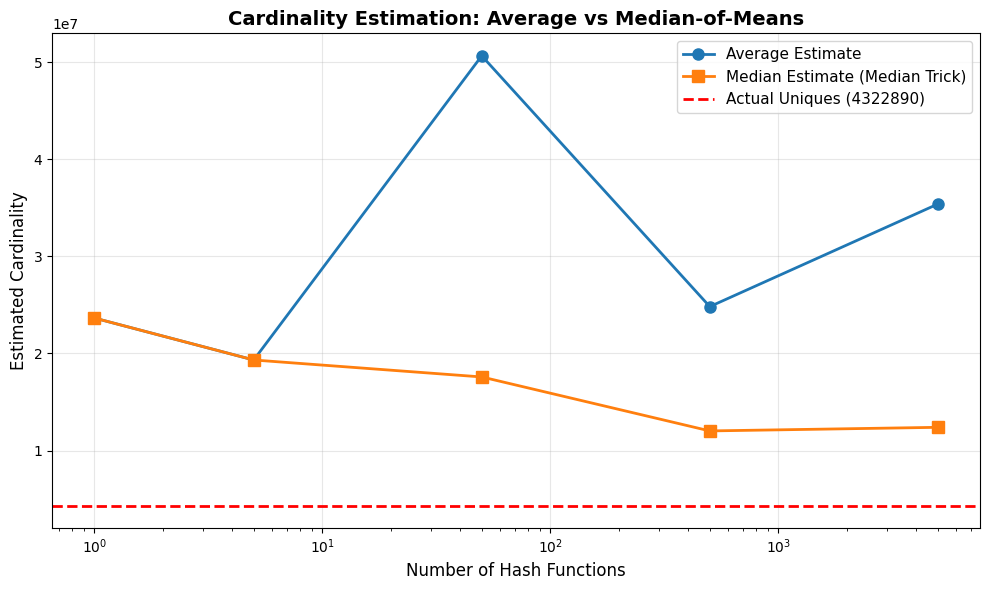


Hash Count   Avg Estimate    Median Estimate Avg Error %  Median Error %
----------------------------------------------------------------------
1            23649598.00     23649598.00     447.08       447.08      
5            19325798.00     19325798.00     347.06       347.06      
50           50658233.00     17578259.70     1071.86      306.63      
500          24824214.49     12018501.00     474.25       178.02      
5000         35389498.67     12389973.30     718.65       186.61      


In [3]:
import re
import matplotlib.pyplot as plt
import os

# Define hash counts (adjust if needed)
hash_counts = [1, 5, 50, 500, 5000]

# Storage for results
avg_estimates = []
median_estimates = []
actual_uniques = None

# Read each file and extract the final line
for h in hash_counts:
    filepath = f"../output/estimate_sharedstream_{h}_hashes.txt"
    
    if not os.path.exists(filepath):
        print(f"Warning: {filepath} not found, skipping...")
        continue
    
    with open(filepath, 'r') as f:
        lines = f.readlines()
        final_line = lines[-1].strip()
        
        # Parse: "Final after 10000000 numbers: avg=5000123.45, median=5000234.56, total uniques=5000000"
        match = re.search(r'avg=([\d.]+), median=([\d.]+), total uniques=(\d+)', final_line)
        
        if match:
            avg = float(match.group(1))
            median = float(match.group(2))
            uniques = int(match.group(3))
            
            avg_estimates.append(avg)
            median_estimates.append(median)
            
            if actual_uniques is None:
                actual_uniques = uniques
            
            print(f"H={h}: avg={avg:.2f}, median={median:.2f}, actual={uniques}")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(hash_counts[:len(avg_estimates)], avg_estimates, 
         marker='o', linewidth=2, markersize=8, label='Average Estimate')
plt.plot(hash_counts[:len(median_estimates)], median_estimates, 
         marker='s', linewidth=2, markersize=8, label='Median Estimate (Median Trick)')

# Add horizontal line for actual count
if actual_uniques:
    plt.axhline(y=actual_uniques, color='red', linestyle='--', 
                linewidth=2, label=f'Actual Uniques ({actual_uniques})')

# Formatting
plt.xscale('log')
plt.xlabel('Number of Hash Functions', fontsize=12)
plt.ylabel('Estimated Cardinality', fontsize=12)
plt.title('Cardinality Estimation: Average vs Median-of-Means', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print(f"\n{'Hash Count':<12} {'Avg Estimate':<15} {'Median Estimate':<15} {'Avg Error %':<12} {'Median Error %':<12}")
print("-" * 70)
for i, h in enumerate(hash_counts[:len(avg_estimates)]):
    avg_err = abs(avg_estimates[i] - actual_uniques) / actual_uniques * 100
    med_err = abs(median_estimates[i] - actual_uniques) / actual_uniques * 100
    print(f"{h:<12} {avg_estimates[i]:<15.2f} {median_estimates[i]:<15.2f} {avg_err:<12.2f} {med_err:<12.2f}")